In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/osmotic/'

In [2]:
def plot_osmotic(chis, chiv, path_list, plot_param_list, Nt_list, rescale = False) :
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
        if label :
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
        else :
            label = True
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + r' ; $\chi_v = $' + str(chiv), alpha=1.)
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + r' ; $\chi_v = $' + str(chiv), alpha=plot_param_list[(chis, chiv)][4])
    return Nt_list[(chis, chiv)]



In [3]:
ca_dict = {0 : ['ca0', 'k'], 0.1 : ['ca1e-1', 'r'], 0.01 : ['ca1e-2', 'b'], 0.001 : ['ca1e-3', 'g'], 10 : ['ca1e1', 'orange']}
# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 0.
chi_dict = {(5, 5) : ['^', 2, 1., lw],
            (50, 50) : ['+', 2, 1., lw],
            (500, 500) : ['o', 2, 1., lw]}
nsim = 20


In [4]:
Nt_N1000 = {}

for chi in chi_dict.keys() :
    subdir = "N1000/chis"+str(chi[0])+"_chiv"+str(chi[1])
    Nt_N1000[chi] = {}
        
    for ca in ca_dict.keys() :
        try :
            Nt_N1000[chi][ca] = {}
            for n in range(nsim) :
                Nt_N1000[chi][ca][n] = np.loadtxt(join(main_dir, subdir, ca_dict[ca][0], 'run'+str(n).zfill(4), 'sim_nlum.dat'))
            print(str(ca) + ' done !')
        except :
            pass
            print(str(ca) + ' not in chis'+str(chi[0])+'_chiv'+str(chi[1]))

       



0 not in chis5_chiv5
0.1 done !
0.01 done !
0.001 not in chis5_chiv5
10 done !
0 not in chis50_chiv50
0.1 done !
0.01 done !
0.001 done !
10 done !
0 done !
0.1 done !
0.01 done !
0.001 done !
10 done !


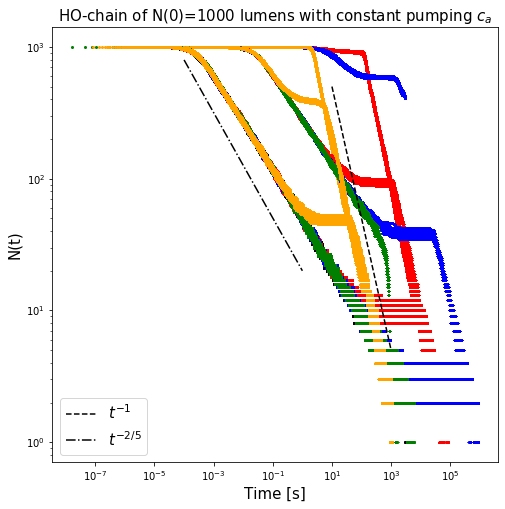

In [6]:
plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

rescaled = False

for chi in chi_dict.keys() :
#for chi in [(5, 5)] :
    for ca in ca_dict.keys() :
        #if ca != 0 :
        try :
            for n in range(nsim) :
                if rescaled :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0]*chi[0]**2, Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3])
                else :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0], Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3])
        except : 
            pass
        

if rescaled :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(2, 3, 101)
    t2 = np.logspace(-4, 0, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

if rescaled :
    plt.xlabel('t/T', fontsize=15)
else :
    plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title(r'HO-chain of N(0)=1000 lumens with constant pumping $c_a$', fontsize=15)
plt.legend(fontsize=15, loc=3)
plt.show()


In [17]:
Nt_N1000[(5, 5)].keys

<function dict.keys>